In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

Valor máximo de píxeles blancos en una fila (maxfil): 0.4296875
Filas con al menos el 90% de maxfil (0.38671875 píxeles): [  6  12  15  20  21  88 100]


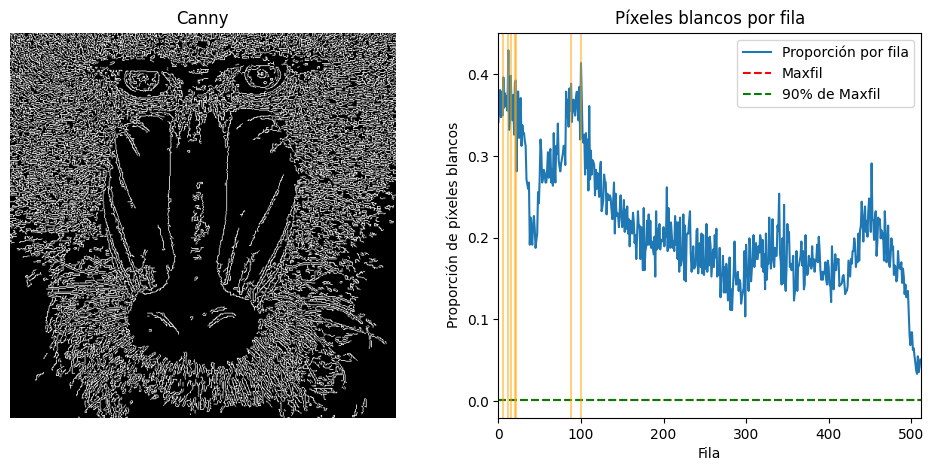

In [2]:
img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)
count_rows = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

rows = count_rows[:] / (255 * canny.shape[1])

maxfil = rows.max()
umbral = maxfil * 0.9
filas_destacadas = np.where(rows >= umbral)[0]
print(f"Valor máximo de píxeles blancos en una fila (maxfil): {maxfil}")
print(f"Filas con al menos el 90% de maxfil ({umbral} píxeles): {filas_destacadas}")

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Píxeles blancos por fila")
plt.xlabel("Fila")
plt.ylabel("Proporción de píxeles blancos")
plt.plot(rows, label="Proporción por fila")
plt.axhline(maxfil/canny.shape[1], color="red", linestyle="--", label="Maxfil")
plt.axhline(0.9*maxfil/canny.shape[1], color="green", linestyle="--", label="90% de Maxfil")
for f in filas_destacadas:
    plt.axvline(f, color="orange", alpha=0.5)
plt.xlim([0, canny.shape[0]])
plt.legend()
plt.show()

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?


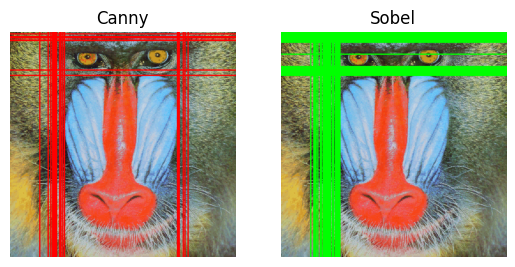

Máximo de filas Sobel 0.69921875
Máximo de filas Canny 0.4296875
Máximo de columnas Sobel 0.662109375
Máximo de columnas Canny 0.365234375


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar y procesar imagen original
img = cv2.imread('mandril.jpg') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)

# Análisis Canny original
col_counts_canny = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols_canny = col_counts_canny[0] / (255 * canny.shape[0])

row_counts_canny = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows_canny = row_counts_canny[:, 0] / (255 * canny.shape[1])

# Procesamiento Sobel
ggris = cv2.GaussianBlur(gris, (3, 3), 0)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
sobel = cv2.add(sobelx, sobely)
sobel8 = cv2.convertScaleAbs(sobel)

# Umbralizado de Sobel
valorUmbral_sobel = 50  # Valor ajustado para Sobel
_, sobel_umbral = cv2.threshold(sobel8, valorUmbral_sobel, 255, cv2.THRESH_BINARY)

# Conteo por columnas y filas para Sobel umbralizado
col_counts_sobel = cv2.reduce(sobel_umbral, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols_sobel = col_counts_sobel[0] / (255 * sobel_umbral.shape[0])

row_counts_sobel = cv2.reduce(sobel_umbral, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows_sobel = row_counts_sobel[:, 0] / (255 * sobel_umbral.shape[1])

# Encontrar máximos y umbrales (90% del máximo)
max_col_canny = np.max(cols_canny)
max_row_canny = np.max(rows_canny)
umbral_col_canny = 0.90 * max_col_canny
umbral_row_canny = 0.90 * max_row_canny

max_col_sobel = np.max(cols_sobel)
max_row_sobel = np.max(rows_sobel)
umbral_col_sobel = 0.90 * max_col_sobel
umbral_row_sobel = 0.90 * max_row_sobel

# Encontrar columnas y filas por encima del umbral
cols_destacadas_canny = np.where(cols_canny > umbral_col_canny)[0]
rows_destacadas_canny = np.where(rows_canny > umbral_row_canny)[0]

cols_destacadas_sobel = np.where(cols_sobel > umbral_col_sobel)[0]
rows_destacadas_sobel = np.where(rows_sobel > umbral_row_sobel)[0]

# Crear imágenes con marcas
img_marked_canny = img_rgb.copy()
img_marked_sobel = img_rgb.copy()

# Marcar líneas destacadas en Canny (rojo)
for col in cols_destacadas_canny:
    cv2.line(img_marked_canny, (col, 0), (col, img_marked_canny.shape[0]), (255, 0, 0), 2)
for row in rows_destacadas_canny:
    cv2.line(img_marked_canny, (0, row), (img_marked_canny.shape[1], row), (255, 0, 0), 2)

# Marcar líneas destacadas en Sobel (verde)
for col in cols_destacadas_sobel:
    cv2.line(img_marked_sobel, (col, 0), (col, img_marked_sobel.shape[0]), (0, 255, 0), 2)
for row in rows_destacadas_sobel:
    cv2.line(img_marked_sobel, (0, row), (img_marked_sobel.shape[1], row), (0, 255, 0), 2)

# Visualización completa
plt.figure()

plt.subplot(1,2,1)
plt.axis("off")
plt.title("Canny")
plt.imshow(img_marked_canny, cmap='gray')

plt.subplot(1,2,2)
plt.axis("off")
plt.title("Sobel")
plt.imshow(img_marked_sobel, cmap='gray')

plt.show()

print("Máximo de filas Sobel", max_row_sobel)
print("Máximo de filas Canny", max_row_canny)

print("Máximo de columnas Sobel", max_col_sobel)
print("Máximo de columnas Canny", max_col_canny)


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.

In [ ]:

import cv2
import numpy as np

# Inicializa cámara
vid = cv2.VideoCapture(0)

modo = 0  # 0 = original

print("Controles:")
print("  Tecla 0 = Modo original")
print("  Tecla 1 = Canales RGB separados")
print("  Tecla 2 = Invertir rojo")
print("  Tecla 3 = Bordes (Canny)")
print("  Tecla 4 = Fondo dinámico (MOG2)")
print("  Tecla 5 = Bloques más claro/oscuro")
print("  Tecla 6 = Diferencia de fotogramas")
print("  Tecla 7 = Umbralizado")
print("  ESC = salir")

# Inicializa sustractor de fondo
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

disponible = 0
while True:
    ret, frame = vid.read()
    if not ret:
        break

    salida = frame.copy()

    if modo == 0:
        # Imagen original
        salida = frame

    elif modo == 1:
        # Canales R, G, B separados en collage
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]

        b_color = np.zeros_like(frame); b_color[:,:,0]= b
        g_color = np.zeros_like(frame); g_color[:,:,1]= g
        r_color = np.zeros_like(frame); r_color[:,:,2]= r

        salida = np.hstack((r_color,g_color,b_color))

    elif modo == 2:
        # Invertir canal rojo
        r = frame[:,:,2]
        r_mod = 255 - r
        r_color_mod = np.zeros_like(frame)
        r_color_mod[:,:,2]= r_mod
        salida = r_color_mod

    elif modo == 3:
        # Bordes Canny
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 100, 200)
        salida = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    elif modo == 4:
        # Sustracción de fondo MOG2
        objetos = eliminadorFondo.apply(frame)
        salida = cv2.cvtColor(objetos, cv2.COLOR_GRAY2BGR)

    elif modo == 5:
        # Bloques más claro y más oscuro
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        block_size = 8
        h, w = gray.shape
        small = cv2.resize(gray, (w // block_size, h // block_size), interpolation=cv2.INTER_AREA)
        minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(small)
        minLoc = (minLoc[0] * block_size, minLoc[1] * block_size)
        maxLoc = (maxLoc[0] * block_size, maxLoc[1] * block_size)
        cv2.rectangle(frame, minLoc, (minLoc[0]+block_size, minLoc[1]+block_size), (255,0,0), 2)
        cv2.rectangle(frame, maxLoc, (maxLoc[0]+block_size, maxLoc[1]+block_size), (0,0,255), 2)
        salida = frame

    elif modo == 6:
        if disponible > 0:
            dif = cv2.absdiff(frame, pframe)
            green_color_mod = np.zeros_like(dif)
            g = 128 - dif[:,:,1]
            green_color_mod[:,:,1] = g
            salida = green_color_mod
        else:
            disponible = 1
        
        pframe = frame.copy()
    elif modo == 7:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
        salida = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR) 

    cv2.imshow('Demostrador', salida)

    # Controles de teclado
    tecla = cv2.waitKey(20)
    if tecla == 27:  # ESC
        break
    elif tecla in [ord('0'), ord('1'), ord('2'), ord('3'), ord('4'), ord('5'), ord('6'), ord('7')]:
        modo = int(chr(tecla))

# Liberar recursos
vid.release()
cv2.destroyAllWindows()



Controles:
  Tecla 0 = Modo original
  Tecla 1 = Canales RGB separados
  Tecla 2 = Invertir rojo
  Tecla 3 = Bordes (Canny)
  Tecla 4 = Fondo dinámico (MOG2)
  Tecla 5 = Bloques más claro/oscuro
  Tecla 6 = Diferencia de fotogramas
  Tecla 7 = Umbralizado
  ESC = salir


In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
cap = cv2.VideoCapture(0)

# detecta movimiento comparando el frame actual con un fonde estimado
fgbg = cv2.createBackgroundSubtractorMOG2()

#lee frame por frame true si se lee correctamente y la imagen actual capturada.
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Extraer la máscara de movimiento, es una imagen en blanco y negro> zonas blancas = movimiento, negras = fondo
    fgmask = fgbg.apply(frame)
   
    # Buscar contornos de movimiento
    contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Convertir frame a PIL para dibujar encima
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(frame_rgb)
    draw = ImageDraw.Draw(pil_img)
    
    for cnt in contours:
        if cv2.contourArea(cnt) > 500:  # umbral mínimo
            x, y, w, h = cv2.boundingRect(cnt)
            # Dibujar un círculo dinámico sobre la persona
            draw.ellipse((x, y, x+w, y+h), outline="red", width=5)
    
    # Convertir de vuelta a OpenCV
    frame_out = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
    
    # Mostrar ventana
    cv2.imshow("Sombras sonoras (demo)", frame_out)
    
    if cv2.waitKey(30) & 0xFF == 27:  # Esc para salir
        break

cap.release()
cv2.destroyAllWindows()